## Testing genetic algorithm
*  Testing Genetic Algorithm as a replacement of GD in BNN Learning


In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import pygad

module_path = os.path.abspath(os.path.join('../')) # or the path
sys.path.append(module_path)

import itertools
import pandas as pd
import numpy as np
from engine import Bool
from bnn import ProdTron, SumTron, ProdLayer, SumLayer
import matplotlib.pyplot as plt

import random


In [177]:
def decode_chromosome(chromosome):
    # Convert binary values to weights (-1 or +1)
    weights = [(Bool(-1) if gene == 0 else Bool(1)) for gene in chromosome]
    return weights

def fitness_function(chromosome, data):
    weights = decode_chromosome(chromosome)
    total_error = 0
    for x, y in data:
        h = [x_i ^ w_i for x_i, w_i in zip(x, weights)]
        y_pred = np.prod(h)# 
        if y_pred.data != y.data:
            total_error += 1  # Count the misclassification
    # Fitness is inversely proportional to total error
#     print("total_error- ", total_error, "y_pred: ", y_pred)
    fitness = 1 / (1 + total_error)
    return fitness

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        chromosome = [random.choice([0, 1]) for _ in range(CHROMOSOME_LENGTH)]
        population.append(chromosome)
    return population

def selection(population, fitnesses):
    # Implement tournament selection
    selected = []
    for _ in range(POPULATION_SIZE):
        i, j = random.sample(range(POPULATION_SIZE), 2)
        if fitnesses[i] > fitnesses[j]:
            selected.append(population[i])
        else:
            selected.append(population[j])
    return selected

def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        point = random.randint(1, CHROMOSOME_LENGTH - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
        return child1, child2
    else:
        return parent1[:], parent2[:]

def mutate(chromosome):
    mutated = chromosome[:]
    for i in range(CHROMOSOME_LENGTH):
        if random.random() < MUTATION_RATE:
            mutated[i] = 1 - mutated[i]  # Flip the bit
    return mutated

def run(data):
    population = initialize_population()
    best_fitness_over_generations= []
    for generation in range(MAX_GENERATIONS):
        # Evaluate fitness
        fitnesses = [fitness_function(chromosome, data) for chromosome in population]
        max_fitness = max(fitnesses)
        best_fitness_over_generations.append(max_fitness)
        if max_fitness == 0.05:#1.0:# 
            print(f"Solution found at generation {generation}")
            break
        # population selection on fitness
        selected_population = selection(population, fitnesses)
        next_generation = []
        for i in range(0, POPULATION_SIZE, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i+1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1)
            child2 = mutate(child2)
            next_generation.extend([child1, child2])
        # Prepare for the next generation
        population = next_generation
    else:
        print("Reached maximum generations without finding a perfect solution.")

    fitnesses = [fitness_function(chromosome, data) for chromosome in population]
    best_index = fitnesses.index(max(fitnesses))
    best_chromosome = population[best_index]
    best_weights = decode_chromosome(best_chromosome)
    print("Best weights found:", best_weights)
    return best_weights, best_fitness_over_generations

def create_sample_data(T = [-1,1]):
    data= []
    for element in itertools.product(T, repeat=5):
        y = Bool(element[0])
        x = [Bool(element[1]),Bool(element[2])]
        data.append((x,y))
    return data

In [178]:
best_weights, fitness_over_generations = run(data)

Reached maximum generations without finding a perfect solution.
Best weights found: [data:-1, grad:0, data:1, grad:0]


In [167]:
POPULATION_SIZE = 80
CHROMOSOME_LENGTH = NUMBER_OF_WEIGHTS = 2
MAX_GENERATIONS = 250
CROSSOVER_RATE = 0.5
MUTATION_RATE = 0.5


T = [-1,1]
data = create_sample_data()

data[:5]

[([data:-1, grad:0, data:-1, grad:0], data:-1, grad:0),
 ([data:-1, grad:0, data:-1, grad:0], data:-1, grad:0),
 ([data:-1, grad:0, data:-1, grad:0], data:-1, grad:0),
 ([data:-1, grad:0, data:-1, grad:0], data:-1, grad:0),
 ([data:-1, grad:0, data:1, grad:0], data:-1, grad:0)]

In [169]:
# Run GA

best_weights = run(data)

Reached maximum generations without finding a perfect solution.
Best weights found: [data:1, grad:0, data:-1, grad:0]


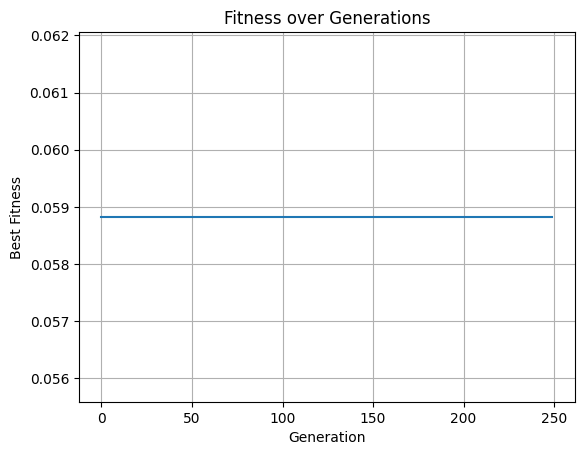

In [180]:
plt.plot(fitness_over_generations)
plt.title('Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.grid(True)
plt.show()


* Evaulate Best_weights

In [170]:
c=0
failed_tests = []
for element in itertools.product(T, repeat=5):
    y = Bool(element[0])
    x = [Bool(element[1]),Bool(element[2])]
    
    yh = np.prod([ xi^wi for xi, wi in zip(x,best_weights)])
    if yh.data == y.data:#element[2]:
#         flag = True
        print('-- Passed! --')
        
    else:
        print(x, y)
        failed_tests.append(((x[0].data, x[1].data), y.data))
        c+=1
print("Total fail: ", c)

-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
[data:-1, grad:0, data:1, grad:0] data:-1, grad:0
[data:-1, grad:0, data:1, grad:0] data:-1, grad:0
[data:-1, grad:0, data:1, grad:0] data:-1, grad:0
[data:-1, grad:0, data:1, grad:0] data:-1, grad:0
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
[data:-1, grad:0, data:-1, grad:0] data:1, grad:0
[data:-1, grad:0, data:-1, grad:0] data:1, grad:0
[data:-1, grad:0, data:-1, grad:0] data:1, grad:0
[data:-1, grad:0, data:-1, grad:0] data:1, grad:0
-- Passed! --
-- Passed! --
-- Passed! --
-- Passed! --
[data:1, grad:0, data:-1, grad:0] data:1, grad:0
[data:1, grad:0, data:-1, grad:0] data:1, grad:0
[data:1, grad:0, data:-1, grad:0] data:1, grad:0
[data:1, grad:0, data:-1, grad:0] data:1, grad:0
[data:1, grad:0, data:1, grad:0] data:1, grad:0
[data:1, grad:0, data:1, grad:0] data:1, grad:0
[data:1, grad:0, data:1, grad:0] data:1, grad:0
[data:1, grad:0, data:1, grad:0] dat

In [171]:
set(failed_tests)# Run 2

{((-1, -1), 1), ((-1, 1), -1), ((1, -1), 1), ((1, 1), 1)}

In [166]:
# set(failed_tests)# Run 1

{((-1, -1), 1), ((-1, 1), 1), ((1, -1), 1), ((1, 1), -1)}

____________

## Ignore cells below this

In [153]:
# for chromosome in population[6:9]:
#     weights = decode_chromosome(chromosome)
#     print("weights: ", weights)
#     total_error = 0
#     for x, y in data:
#         h = [x_i^w_i for x_i, w_i in zip(x, weights)]
#         y_pred = np.prod(h)#
# #         print(f"y_pred: {y_pred.data} vs. y: {y.data}")
#         if y_pred.data != y.data:
#             total_error += 1  # Count the misclassification
#     # Fitness is inversely proportional to total error
#     #     print("total_error- ", total_error, "y_pred: ", y_pred)
#     fitness = 1 / (1 + total_error)
#     print("fitness: ", fitness)
# #     break

weights:  [data:1, grad:0, data:1, grad:0]
fitness:  0.058823529411764705
weights:  [data:-1, grad:0, data:1, grad:0]
fitness:  0.058823529411764705
weights:  [data:-1, grad:0, data:-1, grad:0]
fitness:  0.058823529411764705


In [7]:
# def decode_chromosome(chromosome):
#     # Convert binary genes to weights (-1 or +1)
#     weights = [(Bool(-1) if gene == 0 else Bool(1)) for gene in chromosome]
#     return weights
# chromosome= population[0]
# decode_chromosome(chromosome)

[data:-1, grad:0, data:1, grad:0]

In [159]:
best_weights

[data:1, grad:0, data:1, grad:0]

* Generate simple dataset

   X1  X2  Y
0  -1  -1 -1
1   1   1 -1
2  -1   1  1
3  -1   1  1
4  -1   1  1


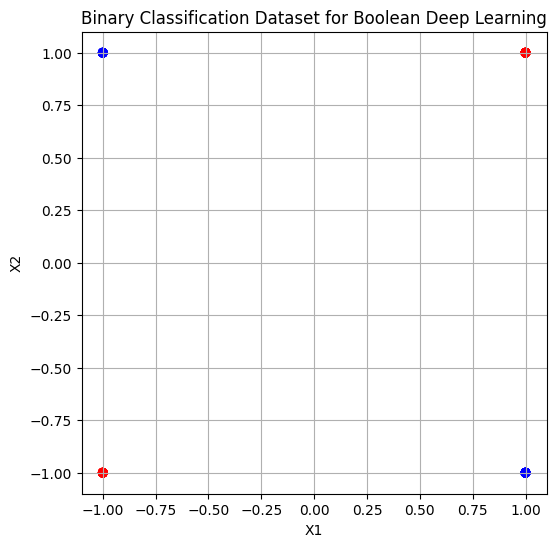

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

num_samples = 100

# Possible Boolean values (-1: False, +1: True)
bool_values = np.array([-1, 1])

X1 = np.random.choice(bool_values, num_samples)
X2 = np.random.choice(bool_values, num_samples)

# XOR operation
def boolean_function(x1, x2):
    return x1 * x2 * -1

Y = boolean_function(X1, X2)

data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'Y': Y
})

print(data.head())

plt.figure(figsize=(6, 6))
colors = {1: 'blue', -1: 'red'}
plt.scatter(data['X1'], data['X2'], c=data['Y'].map(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Binary Classification Dataset for Boolean Deep Learning')
plt.grid(True)
plt.show()


In [157]:
data

,X1,X2,Y
0,-1,-1,-1
1,1,1,-1
2,-1,1,1
3,-1,1,1
4,-1,1,1
...,...,...,...
95,1,1,-1
96,1,1,-1
97,1,1,-1
98,1,-1,1
